In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# BUSINESS PROBLEM-1

Using lending club loans data, the team would like to test below hypothesis on how different
factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)

In [ ]:
loan_data = pd.read_csv('LoansData.csv')

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [ ]:
loan_data.columns = [x.replace('.','_') for x in loan_data.columns]

In [ ]:
loan_data.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

## a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [ ]:
loan_data.Interest_Rate = loan_data.Interest_Rate.fillna(0.0)
loan_data.Amount_Requested = loan_data.Amount_Requested.fillna(0.0)

In [ ]:
loan_data.Interest_Rate = loan_data.Interest_Rate.astype(str).apply(lambda x : x.replace('%','')).astype('float64')

In [ ]:
stats.pearsonr(loan_data.Interest_Rate,loan_data.Amount_Requested)

(0.3325513391340431, 1.282401305161291e-65)

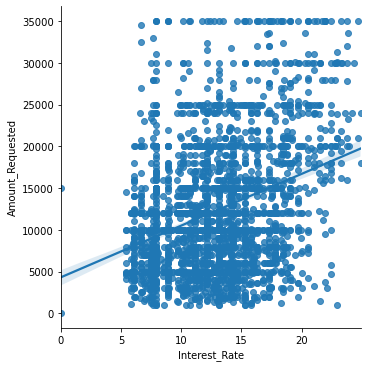

In [ ]:
sns.lmplot(x = 'Interest_Rate', y = 'Amount_Requested', data = loan_data)
plt.show()

In [ ]:
# As there is +ve correlation between Interest rate and loan amounts. Therefore, less interest charged for less loan amounts.

## b. Loan length is directly effecting intrest rate.

In [ ]:
Int_rate_36 = loan_data.Interest_Rate[loan_data.Loan_Length == '36 months']
Int_rate_60 = loan_data.Interest_Rate[loan_data.Loan_Length == '60 months']

In [ ]:
stats.ttest_ind(Int_rate_36,Int_rate_60)

Ttest_indResult(statistic=-23.388325858725516, pvalue=1.4624009311855522e-109)

In [ ]:
# Since pvalue < 0.05, so, we can reject null, i.e. we have evidence to prove that Loan length is directly effecting interest rate.

## c. Interest rate varies for different purpose of loans

In [ ]:
car_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'car']
credit_card_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'credit_card']
debt_consolidation_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'debt_consolidation']
educational_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'educational']
home_improvement_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'home_improvement']
house_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'house']
major_purchase_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'major_purchase']
medical_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'medical']
moving_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'moving']
other_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'other']
renewable_energy_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'renewable_energy']
small_business_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'small_business']
vacation_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'vacation']
wedding_int_rate = loan_data.Interest_Rate[loan_data.Loan_Purpose == 'wedding']

In [ ]:
aov = stats.f_oneway(car_int_rate,credit_card_int_rate,debt_consolidation_int_rate,educational_int_rate,home_improvement_int_rate,house_int_rate,major_purchase_int_rate,medical_int_rate,moving_int_rate,other_int_rate,renewable_energy_int_rate,small_business_int_rate,vacation_int_rate,wedding_int_rate)
print("The f-value is {} and the p value is {}".format(aov.statistic,aov.pvalue))

The f-value is 7.567097722179404 and the p value is 7.248688358935825e-15


In [ ]:
# Since the pvalue is < 0.05, so, with 95% CI, we can reject null, i.e., we have evidence to prove that Interest rate varies for different purpose of loans 

## d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [ ]:
loan_data[['fico_low', 'fico_high']] = loan_data.FICO_Range.str.split('-',expand= True)

In [ ]:
loan_data["Fico_avg"] = (loan_data.fico_low.astype('float') + loan_data.fico_high.astype('float'))/2

In [ ]:
fico_mortgage = loan_data.Fico_avg[loan_data.Home_Ownership == 'MORTGAGE']
fico_none = loan_data.Fico_avg[loan_data.Home_Ownership == 'NONE']
fico_other = loan_data.Fico_avg[loan_data.Home_Ownership == 'OTHER	']
fico_own = loan_data.Fico_avg[loan_data.Home_Ownership == 'OWN']
fico_rent = loan_data.Fico_avg[loan_data.Home_Ownership == 'RENT']

In [ ]:
aovv = stats.f_oneway(fico_mortgage,fico_none,fico_own,fico_rent)
print("The f-value is {} and the p value is {}".format(aovv.statistic,aovv.pvalue))

The f-value is nan and the p value is nan


In [ ]:
# Since p-value<0.05, we can reject null hypothesis with 95% Confidence, so we have the evidence to prove that people with owning home will have high FICO scores.

# BUSINESS PROBLEM - 2

## We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [ ]:
price_quotes = pd.read_csv(r'D:\AnalytxLabs\Python Project\7th\Price_Quotes.csv')

In [ ]:
stats.ttest_ind(price_quotes.Mary_Price,price_quotes.Barry_Price)

Ttest_indResult(statistic=-1.4147436739281787, pvalue=0.17114226132118285)

In [ ]:
# since p-value > 0.05, we cannot reject null hypothesis with 95% Confidence, so, we have the evidence to prove that the average price quotes provided by Mary and Barry are same.

# BUSINESS PROBLEM-3:

## Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [ ]:
treatment_facility = pd.read_csv(r'D:\AnalytxLabs\Python Project\7th\Treatment_Facility.csv')

In [ ]:
post_var5 = treatment_facility.VAR5[treatment_facility.Reengineer == 'Post']
prior_var5 = treatment_facility.VAR5[treatment_facility.Reengineer == 'Prior']

In [ ]:
stats.ttest_ind(post_var5,prior_var5)

Ttest_indResult(statistic=-1.6279144253528646, pvalue=0.12091989189884149)

In [ ]:
# Since pvalue > 0.05, we cannot reject null hypothesis with 95% Confidence, so, we have the evidence to prove that the reengineering effort doesnot improved the critical incidence rate.

In [ ]:
post_Employee_Turnover = treatment_facility.Employee_Turnover[treatment_facility.Reengineer == 'Post']
prior_Employee_Turnover = treatment_facility.Employee_Turnover[treatment_facility.Reengineer == 'Prior']

In [ ]:
stats.ttest_ind(post_Employee_Turnover,prior_Employee_Turnover)

Ttest_indResult(statistic=1.770306704753604, pvalue=0.09361109345535304)

In [ ]:
# Since pvalue > 0.05, we cannot reject null hypothesis with 95% Confidence, so, we have the evidence to prove that the reengineering effort doesnot effect the staff turnover.

# BUSINESS PROBLEM-4

## We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

In [ ]:
priority_Assessment = pd.read_csv(r'D:\AnalytxLabs\Python Project\7th\Priority_Assessment.csv')

In [ ]:
high_days = priority_Assessment.Days[priority_Assessment.Priority == 'High']
low_days = priority_Assessment.Days[priority_Assessment.Priority == 'Low']
medium_days = priority_Assessment.Days[priority_Assessment.Priority == 'Medium']

In [ ]:
stats.f_oneway(high_days,low_days,medium_days)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [ ]:
# Since pvalue > 0.05, we cannot reject null hypothesis with 95% Confidence, so, the prioritization system is not working as mentioned in the above business problem.

# BUSINESS PROBLEM-5
Use the survey results to address the following questions

In [ ]:
films = pd.read_csv(r'D:\AnalytxLabs\Python Project\7th\Films.csv')

## 1. What is the overall level of customer satisfaction?

In [ ]:
films.Overall.mean()

1.6189024390243902

In [ ]:
# the overall level of customer satisfaction is good

## 2. What factors are linked to satisfaction?

In [ ]:
# Sinage, Parking, Clean

## 3. What is the demographic profile of Film on the Rocks patrons?

In [ ]:
films.Gender = np.where(films.Gender == 'Male',1,2)

In [ ]:
films.Marital_Status = np.where(films.Marital_Status == 'Married',1,2)

In [ ]:
stats.pearsonr(films.Marital_Status,films.Gender)

(0.4599592357690238, 1.1117610555354311e-18)

In [ ]:
# There is a positive correlation between Marital_status and gender

In [ ]:
films.Age = films.Age.fillna(0)

In [ ]:
stats.pearsonr(films.Marital_Status,films.Age)

(-0.28482389276743464, 1.4104867412745677e-07)

In [ ]:
# There is a negative correlation between Marital_status and Age

In [ ]:
films.Income = films.Income.fillna(0)

In [ ]:
stats.pearsonr(films.Marital_Status,films.Income)

(-0.03645892818586706, 0.5092437789887411)

In [ ]:
# There is a negative correlation between Marital_status and Income

## 4. In what media outlet(s) should the film series be advertised?

In [ ]:
media_ad = pd.crosstab(films.Movie, films.Hear_About)
media_ad

Hear_About,1,"1,5",2,"2,5",3,"3,4","3,5",4,"4,5",5,"5,4"
Movie,,,,,,,,,,,
Ferris Buellers Day Off,13,1,4,1,4,0,0,17,1,94,0
Old School,1,0,4,0,1,1,0,1,0,24,0
Willy Wonka,8,0,4,1,9,1,1,23,0,108,1


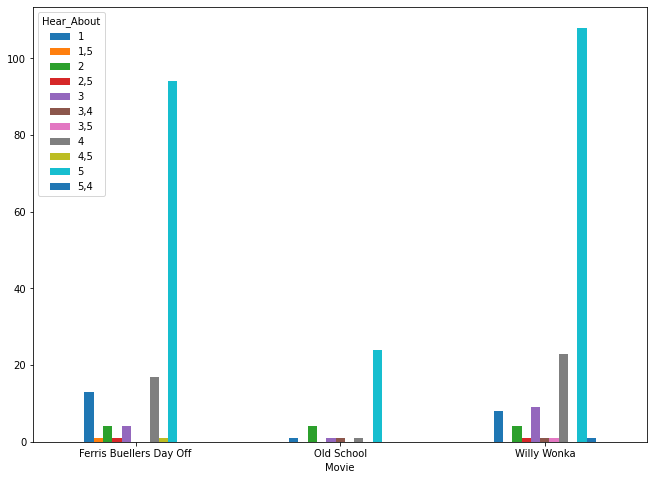

In [ ]:
media_ad.plot(kind = 'bar', figsize  = (11,8))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# 5 = word of mouth, 4 = website and 1 = television are the media outlet(s) the film series should be advertised